In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import mercury as mr

In [13]:
data_choice = mr.Select(value = 'Global', 
                      choices = ['Global', 
                                 'Geomagnetic', 
                                 'Solar Proton', 
                                 'Other'], 
                      label = 'Data type')

mercury.Select

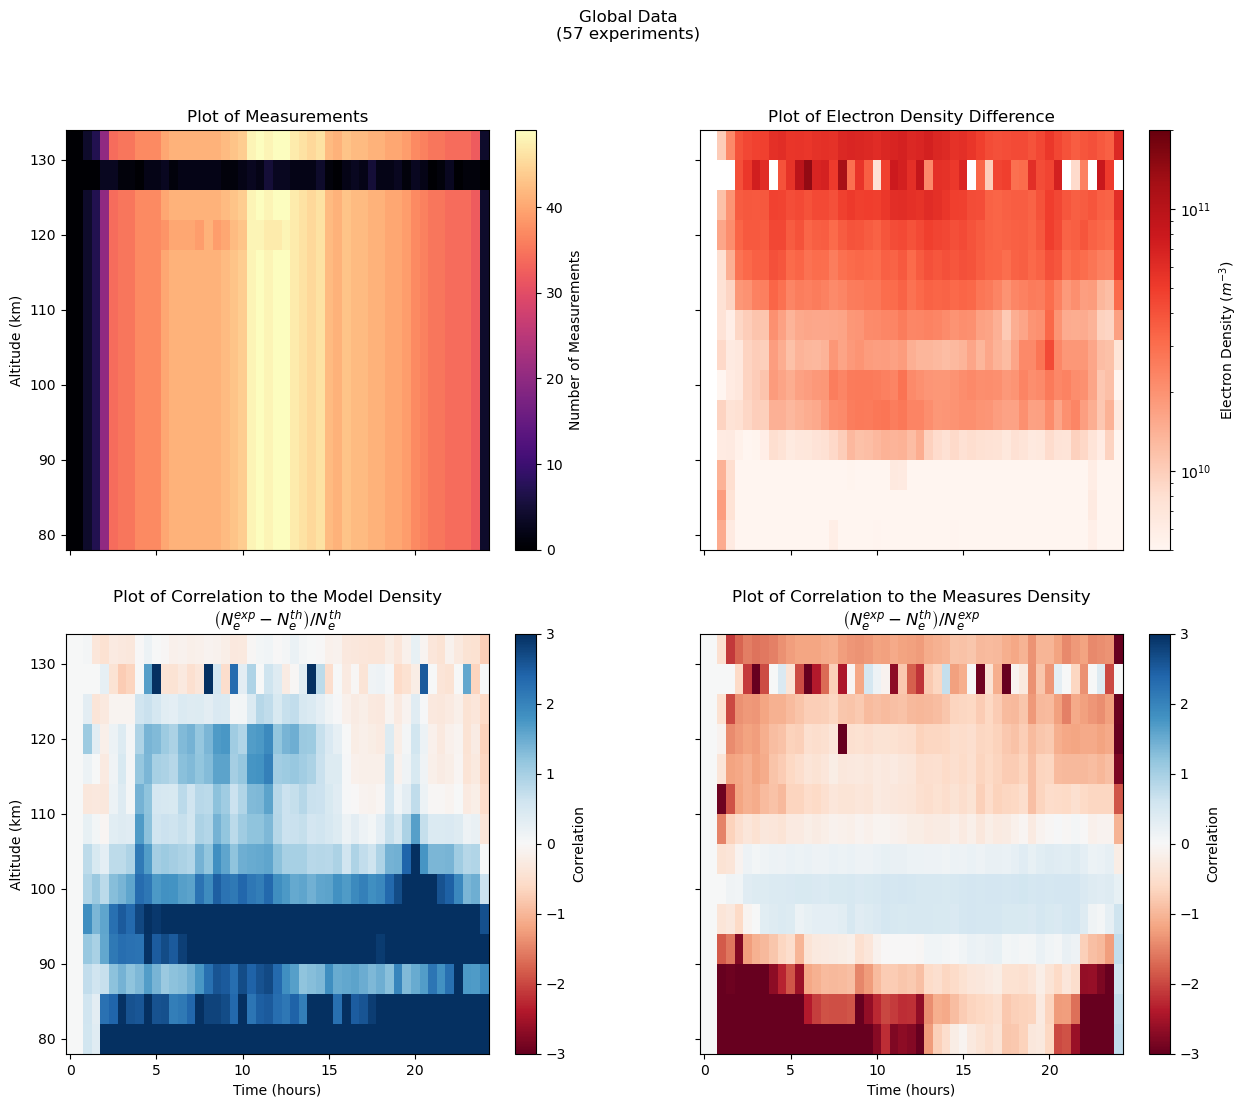

In [47]:
data_type = data_choice.value

correlation_model_path = f"../Results/correlation_model_{data_type.lower().replace(' ', '_')}.npy"
correlation_measure_path = f"../Results/correlation_measure_{data_type.lower().replace(' ', '_')}.npy"
density_path = f"../Results/density_{data_type.lower().replace(' ', '_')}.npy"
frequency_path = f"../Results/frequency_{data_type.lower().replace(' ', '_')}.npy"

time_save = np.linspace(0,24,49)
H_list = np.linspace(80,132,14)

try:
    loaded_frequency = np.load(frequency_path)
except FileNotFoundError:
    loaded_frequency = np.ones(len(time_save)*len(np.unique(H_list)) + 1)

mask = loaded_frequency[1:] != 1
loaded_frequency[1:][mask] -= 1
frequency_grid = loaded_frequency[1:].reshape(len(H_list), len(time_save))

try:
    loaded_density = np.load(density_path)/loaded_frequency[1:]
except FileNotFoundError:
    loaded_density = np.ones(len(time_save)*len(np.unique(H_list)))

density_grid = loaded_density.reshape(len(H_list), len(time_save))

try:
    loaded_model_correlation = np.load(correlation_model_path)/loaded_frequency[1:]
except FileNotFoundError:
    loaded_model_correlation = np.ones(len(time_save)*len(np.unique(H_list)))

try:
    loaded_measure_correlation = np.load(correlation_measure_path)/loaded_frequency[1:]
except FileNotFoundError:
    loaded_measure_correlation = np.ones(len(time_save)*len(np.unique(H_list)))

loaded_model_correlation = loaded_model_correlation.reshape(len(H_list), len(time_save))
loaded_measure_correlation = loaded_measure_correlation.reshape(len(H_list), len(time_save))

loaded_frequency[1:][~mask] -= 1

fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex= True, sharey=True)

contour1 = axs[0][0].pcolormesh(time_save, H_list, frequency_grid, cmap='magma')
#contour1 = axs[0][0].contourf(time_save, H_list, frequency_grid, cmap='magma')
cbar = fig.colorbar(contour1, ax=axs[0][0])
cbar.set_label('Number of Measurements')
axs[0][0].set_ylabel('Altitude (km)')
axs[0][0].set_title('Plot of Measurements')

contour2 = axs[0][1].pcolormesh(time_save, H_list, density_grid, cmap='Reds', norm=LogNorm(vmin=5e9, vmax=2e11))
#contour2 = axs[0][1].contourf(time_save, H_list, density_grid, cmap='Reds')
cbar = fig.colorbar(contour2, ax=axs[0][1])
cbar.set_label(r'Electron Density ($m^{-3}$)')
axs[0][1].set_title('Plot of Electron Density Difference')

norm = Normalize(vmin=-3, vmax=3)

contour3 = axs[1][0].pcolormesh(time_save, H_list, loaded_model_correlation, cmap='RdBu', norm =norm)
#contour3 = axs[1][0].contourf(time_save, H_list, density_grid, cmap='RdBu')
cbar = fig.colorbar(contour3, ax=axs[1][0])
cbar.set_label('Correlation')
axs[1][0].set_xlabel('Time (hours)')
axs[1][0].set_ylabel('Altitude (km)')
axs[1][0].set_title('Plot of Correlation to the Model Density' + '\n' + r'$\left(N_e^{exp} - N_e^{th}\right)/N_e^{th}$')

contour4 = axs[1][1].pcolormesh(time_save, H_list, loaded_measure_correlation, cmap='RdBu', norm =norm)
#contour3 = axs[1][0].contourf(time_save, H_list, density_grid, cmap='RdBu')
cbar = fig.colorbar(contour4, ax=axs[1][1])
cbar.set_label('Correlation')
axs[1][1].set_xlabel('Time (hours)')
axs[1][1].set_title('Plot of Correlation to the Measures Density' + '\n' + r'$\left(N_e^{exp} - N_e^{th}\right)/N_e^{exp}$')

fig.suptitle(f'{data_type} Data' + '\n' + f'({int(loaded_frequency[0]) - 1} experiments)')
plt.show()